<a href="https://colab.research.google.com/github/charithcherry/MLnow_2.0/blob/main/PandasProfiling/EDARetaildata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Retail 


### 1. Problem Statement

Choosing the right strategic decision-making policies for selling the right products to the right customers at the right time, such that the companies can increase their profits.

### 2.Importing packages                                          

In [19]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
from pandas_profiling import ProfileReport                                           # For simple Exploratory data analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd '/content/drive/MyDrive/data'

/content/drive/MyDrive/data


In [5]:
!ls

'Online Retail.xlsx'


### 3.Data loading and Description

#### Importing the Dataset

In [6]:
data = pd.read_excel("Online Retail.xlsx")     
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 4. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 5.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [7]:
data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(541909, 8)

**Observations:**
- data has __541909 rows__ and __8 columns.__

In [8]:
data.columns                                            # This will print the names of all columns.

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Observations:**
- We can see that there are **missing data** as all features do not contain **equal number of records**.
- All the **variables** are present in **appropriate data types**.

#Checking Null values

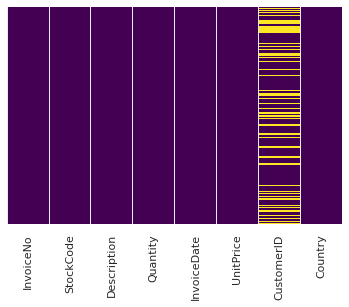

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)


**Observations:**
- We can observe that there are many **null values** present in the **CustomerID** column.
- All the **variables** are present in **appropriate data types**.

# Treating Null values

In [11]:
data=data.replace(np.nan,0)

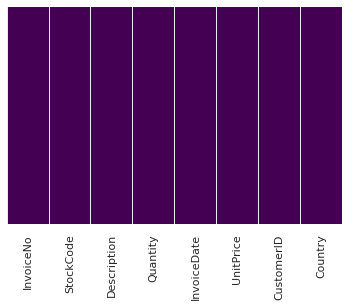

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)


# Data description

In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,11476.974671
std,218.081158,96.759853,6777.908326
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12352.000000
50%,3.000000,2.080000,14382.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9251893e50>,
      dtype=object)

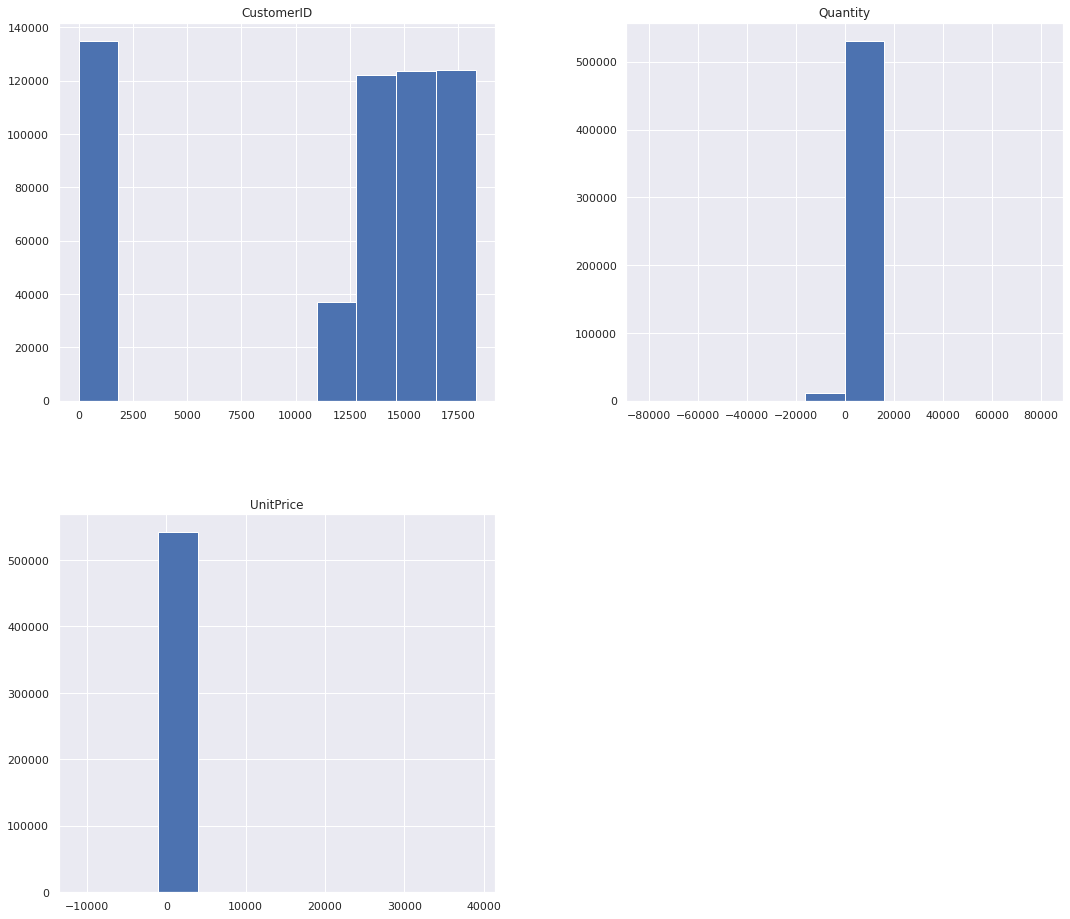

In [14]:
data.hist(bins=10,figsize=(18, 16))

**Observations:**
- There are many 0 customer Ids which were initially null.  

- On average, Passengers were not travelling with their *parents and children*.

- The maximum fare is found to be **512** dollars. Fare attribute values distribution is strongly positevely skewed with mean 32.2042 and large stadard deviation of 49.6934. Because the distribution is skewed median is much smaller than the mean with value of 14.4542. The range of data is large ranging from 0 to 512. At the same time 75% of the data is lower than 31.

- Ticket_Class distribution shows that almost 500 out of all 891 passengers in the dataset were travelling the third class and 200 passengers were travelling both in first and second class.

- SibSp (number of siblings/spouses aboard) is similar to Parch distribution but with larger number of passengers travelling with one sibling/spouse.

- Survived obviously shows only two values but we can also see that number of survivors is much smaller than the number of passengers who died in the disaster.

### 5.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [20]:
!pip install pandas==0.25                    # You need to install pandas version 0.25 for pandas profiling or it might give some error while profiling

     |████████████████████████████████| 10.4MB 26.3MB/s 
ERROR: xarray 0.18.2 has requirement pandas>=1.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [23]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="Retail_before_preprocessing.html")

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __data_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
- Number of variables: 8
- Number of observations: 	541909
- Missing cells: 	0.0%

__Variables types__: 
- Numeric	3
-Categorical	4
-Boolean	0
-Date	1
-Text (Unique)	0
-Rejected	0
-Unsupported	0


Warnings

-InvoiceNo has a high cardinality: 25900 distinct values Warning

-StockCode has a high cardinality: 4070 distinct values Warning

-Description has a high cardinality: 4224 distinct values Warning

-UnitPrice is highly skewed (γ1 = 186.51) Skewed

-CustomerID has 135080 / 24.9% zeros Zeros

-Dataset has 5268 duplicate rows Warning

###5.3 Preprocessing

In [25]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Observations:**
- From the above output we can see that Null values were replaced

In [26]:
a=data['Description'].mode()[0]
a

'WHITE HANGING HEART T-LIGHT HOLDER'

In [49]:
data['InvoiceDate'].unique()

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [28]:
data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [47]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [32]:
data[data.Quantity<0].head()   #displaying only negative quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


### 6. Exploratory Data Analysis

### 6.1. What was the demographic structure of Quantity?

In [44]:
Q_groups = pd.cut(data["Quantity"], bins=[-81000,-50000,-25000,-10000,-5000,-2000,-500,0,500,2000,5000,10000, 20000,40000, 60000,80000]).value_counts().sort_index()
Q_groups

(-81000, -50000]         2
(-50000, -25000]         0
(-25000, -10000]         0
(-10000, -5000]          5
(-5000, -2000]          14
(-2000, -500]           89
(-500, 0]            10514
(0, 500]            530852
(500, 2000]            407
(2000, 5000]            22
(5000, 10000]            1
(10000, 20000]           1
(20000, 40000]           0
(40000, 60000]           0
(60000, 80000]           1
Name: Quantity, dtype: int64

- Majority of the Quantity lies between -500 and 500




In [33]:
data["Quantity"].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

- You can notice that the least quantity was -80995 
- You can notice that the most quantity was 80995








In [50]:
data["UnitPrice"].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

- You can notice that the least Price was -11062
- You can notice that the most Price was 38970








In [34]:
data.loc[data["Quantity"].argmin()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


InvoiceNo                          C581484
StockCode                            23843
Description    PAPER CRAFT , LITTLE BIRDIE
Quantity                            -80995
InvoiceDate            2011-12-09 09:27:00
UnitPrice                             2.08
CustomerID                           16446
Country                     United Kingdom
Name: 540422, dtype: object

In [45]:
data.loc[data["Quantity"].argmax()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


InvoiceNo                           581483
StockCode                            23843
Description    PAPER CRAFT , LITTLE BIRDIE
Quantity                             80995
InvoiceDate            2011-12-09 09:15:00
UnitPrice                             2.08
CustomerID                           16446
Country                     United Kingdom
Name: 540421, dtype: object

- It was PAPER CRAFT , LITTLE BIRDIE with least quantity as well as the most quantity



In [46]:
descp = data["Description"].value_counts()
descp

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
GREEN/BLUE CERAMIC CANDLE HOLDER         1
John Lewis                               1
DOORKNOB CERAMIC IVORY                   1
SWEETHEART KEY CABINET                   1
PINK/WHITE GLASS DEMI CHOKER             1
Name: Description, Length: 4224, dtype: int64

Observations:

- The top three Items are 
  - WHITE HANGING HEART T-LIGHT HOLDER    2369
  -REGENCY CAKESTAND 3 TIER              2200
  -JUMBO BAG RED RETROSPOT               2159

In [48]:
ctry = data["Country"].value_counts()
ctry

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

The situation is pretty similar in case of passengers travelling with parents or children. 

- Most of them (495478) are from United Kingdom

- only 10 are from Saudi Arabia

- Using Countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

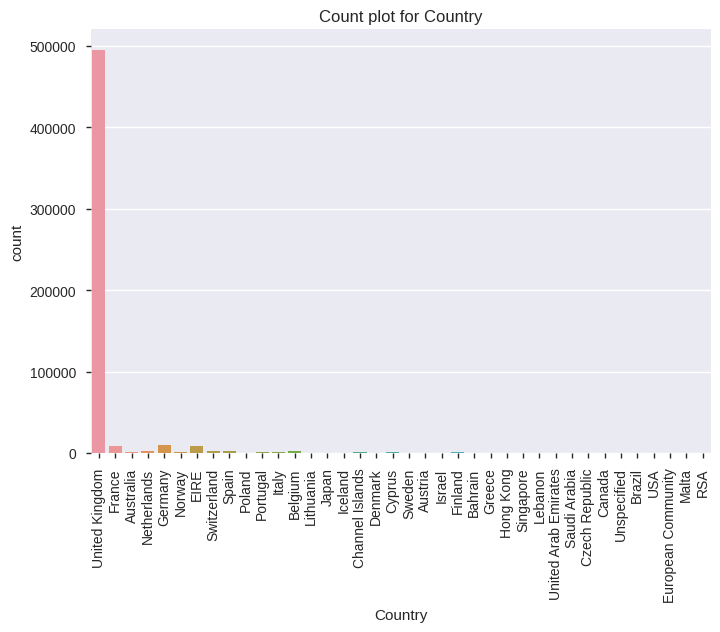

In [54]:
sns.countplot(x='Country', data=data).set_title('Count plot for Country')
plt.xticks(rotation=90)

**Observations:**
- You can see that __more items are exported to UK.__ 



Text(0.5, 1.0, 'Quantity distribution using FacetGrid')

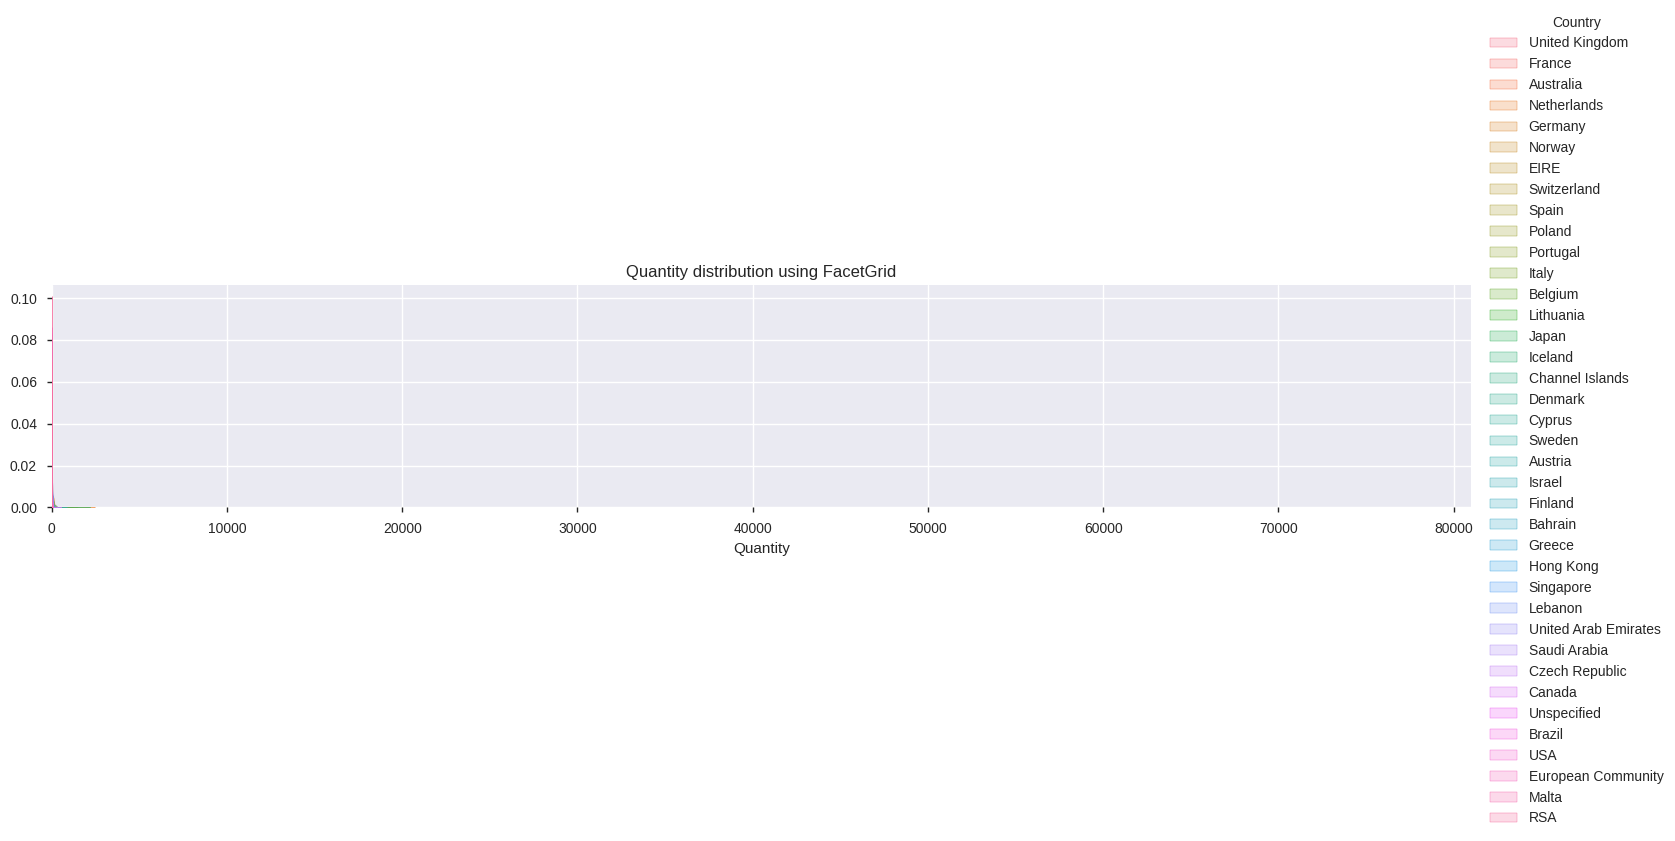

In [58]:
as_fig = sns.FacetGrid(data,hue='Country',aspect=5)

as_fig.map(sns.kdeplot,'Quantity',shade=True)

oldest = data['Quantity'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Quantity distribution using FacetGrid')